In [26]:
# Core
import re, os, glob
import pandas as pd
from pandas.compat import StringIO
import scipy as sp
import numpy as np
import csv
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="ticks")
from datetime import datetime
import matplotlib.dates as mdates

In [71]:
titrations = pd.read_csv("./Test_titrations.csv")
titrations.dropna(inplace=True)
titrations["datetime"] = [" ".join([row["Date"], row["Time"]]) for i, row in titrations.iterrows()]
titrations["datetime"] = [datetime.strptime(dt, "%d %B %Y %H:%M") for dt in titrations["datetime"]]
titrations.head()

,Date,Time,Sample,Mass_g,pHi,uL_NaOH,pHf,ueq_H,datetime
0,12 February 2019,16:00,AM,0.22245,5.64,831.0,7.03,7.47,2019-02-12 16:00:00
1,12 February 2019,16:00,OR,0.21921,5.97,440.0,7.00,4.01,2019-02-12 16:00:00
2,12 February 2019,16:00,OF,0.23501,5.61,940.0,7.03,8.00,2019-02-12 16:00:00
3,13 February 2019,4:00,OF,0.15241,6.03,523.0,7.03,6.86,2019-02-13 04:00:00
4,13 February 2019,4:00,AM,0.17704,5.28,1246.0,7.01,14.08,2019-02-13 04:00:00


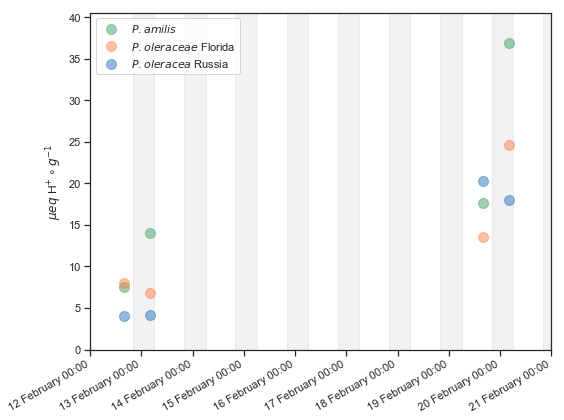

In [70]:
fig, ax = plt.subplots(figsize = (8,6))

for i in range(12, 21, 1):
    rect = mpatches.Rectangle((datetime(2019, 2, i, 20), 0), timedelta(hours = 10), 
                              1000, color='grey', alpha=0.10)
    ax.add_patch(rect) 
    
ax.plot_date(x = titrations.loc[titrations["Sample"]=="AM"]["datetime"], 
           y = titrations.loc[titrations["Sample"]=="AM"]["ueq_H"], 
           color = "xkcd:greenish", marker = "o", label = "$P. amilis$", alpha = 0.5, markersize=10)
ax.plot_date(x = titrations.loc[titrations["Sample"]=="OF"]["datetime"], 
           y = titrations.loc[titrations["Sample"]=="OF"]["ueq_H"], 
           color = "xkcd:orangish", marker = "o", label = "$P. oleraceae$ Florida", alpha = 0.5, markersize=10)
ax.plot_date(x = titrations.loc[titrations["Sample"]=="OR"]["datetime"], 
           y = titrations.loc[titrations["Sample"]=="OR"]["ueq_H"], 
           color = "xkcd:bluish", marker = "o", label = "$P. oleracea$ Russia", alpha = 0.5, markersize=10)
plt.legend(loc = "upper left")

ax.set_xlim([datetime(2019, 2, 12, 0), datetime(2019, 2, 21, 0)])
ax.set_ylim([0, titrations["ueq_H"].max()*1.1])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %B %H:%M'))
ax.set_ylabel("$\mu eq$ H$^{+}\circ g^{-1}$")
fig.autofmt_xdate()
plt.tight_layout()
# plt.savefig("./test_titrations.pdf", dpi = 100, transparent=True)